<a href="https://colab.research.google.com/github/PauloHTFKobe1992/Challenge-Data-Science/blob/main/CHALLENGE_D%26A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Tratando dados inconsistentes:

* Eliminar linhas que a data de inicio é igual a de termino
* Zerar campos com estoque negativo





In [ ]:
a = pd.read_csv('/content/ofertas_relampago.csv', sep=',')
df = pd.DataFrame(a)
df.head()
basecrua = len(df)



In [ ]:

basecrua

48746

In [ ]:
incio_final_iguais = (df['OFFER_START_DTTM'] == df['OFFER_FINISH_DTTM']).sum()

In [ ]:
df_tratado = df[df['OFFER_START_DTTM'] != df['OFFER_FINISH_DTTM']]
base_sem_datas_iguais = df_tratado.shape[0]
base_sem_datas_iguais

47432

In [ ]:
df_tratado

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48741,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,15,9,16.28,6.0,NaN,none,HOME&DECOR,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS
48742,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-DECORATIVE_PAINTINGS
48743,2021-06-19,2021-06-19 07:00:00+00:00,2021-06-19 13:00:03+00:00,lightning_deal,5,3,16.62,2.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS
48744,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:00+00:00,lightning_deal,5,1,38.79,4.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS


In [ ]:
estoque_negativo = (df['REMAINING_STOCK_AFTER_END'] < 0).sum()
estoque_negativo

1273

In [ ]:
df_tratado['REMAINING_STOCK_AFTER_END'] = df_tratado['REMAINING_STOCK_AFTER_END'].apply(lambda x: max(0,x))
df_tratado

<ipython-input-8-652146350f2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tratado['REMAINING_STOCK_AFTER_END'] = df_tratado['REMAINING_STOCK_AFTER_END'].apply(lambda x: max(0,x))


,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,0,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48741,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,15,9,16.28,6.0,NaN,none,HOME&DECOR,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS
48742,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-DECORATIVE_PAINTINGS
48743,2021-06-19,2021-06-19 07:00:00+00:00,2021-06-19 13:00:03+00:00,lightning_deal,5,3,16.62,2.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS
48744,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:00+00:00,lightning_deal,5,1,38.79,4.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS


In [ ]:
estoque_inicial_final_igual_venda_maior_que_zero = df[(df['INVOLVED_STOCK'] == df['REMAINING_STOCK_AFTER_END']) & (df['SOLD_QUANTITY'] > 0)]
estoque_inicial_final_igual_venda_maior_que_zero.shape[0]


213

In [ ]:
df_tratado = df_tratado.drop(df_tratado[(df_tratado['INVOLVED_STOCK'] == df_tratado['REMAINING_STOCK_AFTER_END']) & (df_tratado['SOLD_QUANTITY'] > 0)].index)
df_tratado

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,0,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48741,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,15,9,16.28,6.0,NaN,none,HOME&DECOR,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS
48742,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-DECORATIVE_PAINTINGS
48743,2021-06-19,2021-06-19 07:00:00+00:00,2021-06-19 13:00:03+00:00,lightning_deal,5,3,16.62,2.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS
48744,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:00+00:00,lightning_deal,5,1,38.79,4.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS


In [ ]:
df_tratado.describe()

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
count,47219.000000,47219.000000,24366.000000,24366.000000
mean,35.431966,30.926851,51.557792,10.934006
std,209.443813,198.276879,175.951698,45.664802
min,1.000000,0.000000,0.280000,1.000000
25%,5.000000,4.000000,5.770000,1.000000
50%,10.000000,8.000000,12.540000,3.000000
75%,15.000000,15.000000,31.175000,6.000000
max,9000.000000,8635.000000,4836.570000,1646.000000


In [ ]:
p = df_tratado.groupby('VERTICAL')
analise_por_vertical = p.agg({'SOLD_AMOUNT': ['sum','mean', 'median', 'std'],
           'SOLD_QUANTITY': ['sum','mean', 'median', 'std', 'count']
           })
analise_por_vertical = analise_por_vertical.rename(columns={'SOLD_AMOUNT':'Analise R$ de vendas', 'SOLD_QUANTITY':'Analise quantidade de vendas'})
analise_por_vertical = analise_por_vertical.sort_values(('Analise quantidade de vendas', 'sum'),ascending=False)
analise = pd.DataFrame(analise_por_vertical)
display(analise)

Analise R$ de vendas                                  \
                                 sum        mean  median         std   
VERTICAL                                                               
BEAUTY & HEALTH            547186.73  124.445470  20.060  289.036999   
HOME & INDUSTRY            155121.51   29.114398  13.140   69.960207   
APP & SPORTS               130643.58   19.824519  10.380   41.152719   
CE                         361719.85   80.489508  15.935  261.311105   
CPG                         16751.11   13.994244   7.750   19.087602   
ACC                         26753.34   20.611202  11.510   30.930090   
T & B                       14230.78   18.433653   9.175   29.119359   
OTHERS                       1916.74   16.523621  10.180   15.440110   
ENTERTAINMENT                1933.53   11.112241   6.835   13.076462   

                Analise quantidade de vendas                                \
                                         sum       mean median         std   
VERTICAL                                                                     
BEAUTY & HEALTH                     178098.0  40.504435    5.0  101.194157   
HOME & INDUSTRY                      27094.0   5.085210    3.0    7.508950   
APP & SPORTS                         25584.0   3.882246    2.0    8.638440   
CE                                   21788.0   4.848242    3.0    7.022340   
CPG                                   5682.0   4.746867    3.0    6.106243   
ACC                                   5140.0   3.959938    2.5    3.937632   
T & B                                 2325.0   3.011658    2.0    3.980643   
OTHERS                                 354.0   3.051724    2.0    3.035571   
ENTERTAINMENT                          353.0   2.028736    1.0    1.395402   

                       
                count  
VERTICAL               
BEAUTY & HEALTH  4397  
HOME & INDUSTRY  5328  
APP & SPORTS     6590  
CE               4494  
CPG              1197  
ACC              1298  
T & B             772  
OTHERS            116  
ENTERTAINMENT     174

In [ ]:
p = df_tratado.groupby('VERTICAL')
analise_por_vertical = p.agg({'SOLD_AMOUNT': ['sum','mean', 'median', 'std'],
           'SOLD_QUANTITY': ['sum','mean', 'median', 'std', 'count']
           })
analise_por_vertical = analise_por_vertical.rename(columns={'SOLD_AMOUNT':'Analise R$ de vendas', 'SOLD_QUANTITY':'Analise quantidade de vendas'})
analise_por_vertical = analise_por_vertical.sort_values(('Analise R$ de vendas', 'sum'),ascending=False)
analise = pd.DataFrame(analise_por_vertical)
display(analise)

Analise R$ de vendas                                  \
                                 sum        mean  median         std   
VERTICAL                                                               
BEAUTY & HEALTH            547186.73  124.445470  20.060  289.036999   
CE                         361719.85   80.489508  15.935  261.311105   
HOME & INDUSTRY            155121.51   29.114398  13.140   69.960207   
APP & SPORTS               130643.58   19.824519  10.380   41.152719   
ACC                         26753.34   20.611202  11.510   30.930090   
CPG                         16751.11   13.994244   7.750   19.087602   
T & B                       14230.78   18.433653   9.175   29.119359   
ENTERTAINMENT                1933.53   11.112241   6.835   13.076462   
OTHERS                       1916.74   16.523621  10.180   15.440110   

                Analise quantidade de vendas                                \
                                         sum       mean median         std   
VERTICAL                                                                     
BEAUTY & HEALTH                     178098.0  40.504435    5.0  101.194157   
CE                                   21788.0   4.848242    3.0    7.022340   
HOME & INDUSTRY                      27094.0   5.085210    3.0    7.508950   
APP & SPORTS                         25584.0   3.882246    2.0    8.638440   
ACC                                   5140.0   3.959938    2.5    3.937632   
CPG                                   5682.0   4.746867    3.0    6.106243   
T & B                                 2325.0   3.011658    2.0    3.980643   
ENTERTAINMENT                          353.0   2.028736    1.0    1.395402   
OTHERS                                 354.0   3.051724    2.0    3.035571   

                       
                count  
VERTICAL               
BEAUTY & HEALTH  4397  
CE               4494  
HOME & INDUSTRY  5328  
APP & SPORTS     6590  
ACC              1298  
CPG              1197  
T & B             772  
ENTERTAINMENT     174  
OTHERS            116

# ANALISE POR DOM_DOMAIN_AGG1

In [ ]:
p = df_tratado.groupby('DOM_DOMAIN_AGG1')
analise_por_dominio = p.agg({'SOLD_AMOUNT': ['sum','mean', 'median', 'std'],
           'SOLD_QUANTITY': ['sum','mean', 'median', 'std', 'count']
           })
analise_por_dominio = analise_por_dominio.rename(columns={'SOLD_AMOUNT':'Analise R$ de vendas', 'SOLD_QUANTITY':'Analise quantidade de vendas'})
analise_por_dominio = analise_por_dominio.sort_values(('Analise R$ de vendas', 'sum'),ascending=False)
analise_dominio = pd.DataFrame(analise_por_dominio)
display(analise_dominio)

Analise R$ de vendas                      \
                                              sum        mean  median   
DOM_DOMAIN_AGG1                                                         
PHARMACEUTICS                           440101.59  200.867910  61.150   
MOBILE                                  158128.15  153.821158  15.815   
ELECTRONICS                             119713.58   88.154330  21.870   
BEAUTY EQUIPMENT                         88788.62  129.618423  31.110   
HOME&DECOR                               87491.89   25.923523  12.910   
COMPUTERS                                83878.12   39.790380  12.710   
APPAREL                                  36473.78   18.505216  10.190   
APPAREL ACCESORIES                       36417.29   17.466326   8.490   
SPORTS                                   33051.03   19.591600   9.900   
INDUSTRY                                 25828.86   49.862664  15.660   
TOOLS AND CONSTRUCTION                   23951.94   35.484356  17.870   
FOOTWEAR                                 20540.06   28.098577  18.790   
PERSONAL CARE                            18296.52   12.029270   7.110   
AUTOPARTS                                14858.23   16.619944  10.615   
SECURITY                                 10758.67   56.624579  32.900   
TOYS AND GAMES                            8142.01   18.174129   8.855   
STATIONARY                                7090.15   12.438860   6.735   
MOTOPARTS                                 5770.53   20.390565  12.110   
PERSONAL HYGIENE                          4983.88   14.321494   7.940   
PETS FOOD                                 4731.51   18.627992  12.320   
BABY                                      4445.48   25.996959  14.390   
SUPLEMENTS                                4161.42   35.874310  24.555   
VEHICULAR MULTIMEDIA                      4144.59   74.010536  41.870   
CLEANING                                  3564.39   20.024663  10.470   
FOODS                                     2749.75    8.135355   5.180   
BOOKS, MULTIMEDIA & OTHER E!              1685.20   10.091018   6.680   
PET PRODUCTS                              1666.19   15.868476   9.490   
PARTY                                     1643.29   10.740458   7.970   
WHEELS & TIRES                            1007.59  100.759000  89.170   
ACC TOOLS                                  972.40   17.680000   8.600   
DRINKS                                     430.23   15.365357   6.880   
BATTERIES                                  291.35    5.712745   3.550   
MUSICAL INSTRUMENTS                        248.33   35.475714  16.900   
OTHER                                      136.75   17.093750  10.250   
ANTIQUES & HOBBIES                         113.80   37.933333  21.300   
AGRO                                         0.00         NaN     NaN   

                                         Analise quantidade de vendas  \
                                     std                          sum   
DOM_DOMAIN_AGG1                                                         
PHARMACEUTICS                 351.787136                     147676.0   
MOBILE                        433.174246                       5497.0   
ELECTRONICS                   240.751708                       5139.0   
BEAUTY EQUIPMENT              305.412314                      24292.0   
HOME&DECOR                     44.630088                      18222.0   
COMPUTERS                     111.805131                      11152.0   
APPAREL                        42.991578                       7828.0   
APPAREL ACCESORIES             45.868680                       7627.0   
SPORTS                         35.799847                       7609.0   
INDUSTRY                      174.461788                       2828.0   
TOOLS AND CONSTRUCTION         56.132706                       2733.0   
FOOTWEAR                       31.523502                       2107.0   
PERSONAL CARE                  16.085660                       6130.0   
AUTOPARTS    

In [ ]:
p = df_tratado.groupby('OFFER_START_DATE')
analise_por_dominio = p.agg({'SOLD_AMOUNT': ['sum','mean', 'median', 'std'],
           #'SOLD_QUANTITY': ['sum','mean', 'median', 'std', 'count']
           })
analise_por_dominio = analise_por_dominio.rename(columns={'SOLD_AMOUNT':'Analise R$ de vendas', 'SOLD_QUANTITY':'Analise quantidade de vendas'})
analise_por_dominio = analise_por_dominio.sort_values(('Analise R$ de vendas', 'sum'),ascending=False)
analise_dominio = pd.DataFrame(analise_por_dominio)
analise_dominio.head(10)

Analise R$ de vendas                               
                                  sum       mean  median         std
OFFER_START_DATE                                                    
2021-07-14                   39904.73  82.447789  13.125  297.335723
2021-07-27                   37524.48  65.259965  12.560  275.032560
2021-07-26                   37045.56  65.567363  11.530  247.211940
2021-07-15                   36890.35  80.371133  13.430  244.993687
2021-07-12                   34718.60  76.981375  14.530  277.347765
2021-07-19                   34643.59  72.476130  16.870  311.852674
2021-07-24                   32333.90  60.212104  11.170  208.728734
2021-07-20                   31602.94  66.955381  14.675  227.947197
2021-07-05                   30796.38  62.214909  13.620  201.386151
2021-07-06                   30222.24  53.585532  13.570  155.043350

# ANALISE DO VOLUME DE PROMOÇÕES COM TIPO DE ENVIO

In [ ]:
p = df_tratado.groupby(['SHIPPING_PAYMENT_TYPE'])
analise_por_envio = p.agg({'SOLD_AMOUNT': ['count','sum','mean', 'median', 'std'],
           #'SOLD_QUANTITY': ['sum','mean', 'median', 'std', 'count']
           })
analise_por_envio = analise_por_envio.rename(columns={'SOLD_AMOUNT':'Analise R$ de vendas'})
analise_por_envio = analise_por_envio.sort_values(('Analise R$ de vendas', 'sum'),ascending=False)
analise_por_envio = pd.DataFrame(analise_por_envio)
display(analise_por_envio)

Analise R$ de vendas                               \
                                     count        sum       mean median   
SHIPPING_PAYMENT_TYPE                                                     
free_shipping                        11629  746505.54  64.193442  19.97   
none                                 12737  509751.63  40.021326   7.95   

                                   
                              std  
SHIPPING_PAYMENT_TYPE              
free_shipping          192.452447  
none                   158.532195

In [ ]:
p = df_tratado.groupby(['VERTICAL','SHIPPING_PAYMENT_TYPE'])
analise_por_envio = p.agg({'SOLD_AMOUNT': ['count','sum','mean', 'median', 'std'],
           #'SOLD_QUANTITY': ['sum','mean', 'median', 'std', 'count']
           })
analise_por_envio = analise_por_envio.rename(columns={'SOLD_AMOUNT':'Analise R$ de vendas'})
analise_por_envio = analise_por_envio.sort_values(('Analise R$ de vendas', 'sum'),ascending=False)
analise_por_envio = pd.DataFrame(analise_por_envio)
display(analise_por_envio)

Analise R$ de vendas             \
                                                     count        sum   
VERTICAL        SHIPPING_PAYMENT_TYPE                                   
BEAUTY & HEALTH none                                  2808  381500.92   
CE              free_shipping                         2543  335687.73   
BEAUTY & HEALTH free_shipping                         1589  165685.81   
HOME & INDUSTRY free_shipping                         2500  109395.45   
APP & SPORTS    free_shipping                         3341   93130.79   
HOME & INDUSTRY none                                  2828   45726.06   
APP & SPORTS    none                                  3249   37512.79   
CE              none                                  1951   26032.12   
ACC             free_shipping                          591   18950.44   
T & B           free_shipping                          427   10994.78   
CPG             free_shipping                          480    9791.87   
ACC             none                                   707    7802.90   
CPG             none                                   717    6959.24   
T & B           none                                   345    3236.00   
ENTERTAINMENT   free_shipping                           92    1528.51   
OTHERS          free_shipping                           66    1340.16   
                none                                    50     576.58   
ENTERTAINMENT   none                                    82     405.02   

                                                                       
                                             mean  median         std  
VERTICAL        SHIPPING_PAYMENT_TYPE                                  
BEAUTY & HEALTH none                   135.862151  15.100  315.677588  
CE              free_shipping          132.004613  30.910  337.812824  
BEAUTY & HEALTH free_shipping          104.270491  27.000  233.411143  
HOME & INDUSTRY free_shipping           43.758180  21.055   93.052131  
APP & SPORTS    free_shipping           27.875124  15.370   50.115478  
HOME & INDUSTRY none                    16.169045   8.330   34.804621  
APP & SPORTS    none                    11.545950   6.900   26.789151  
CE              none                    13.342963   7.170   24.453197  
ACC             free_shipping           32.065042  19.370   41.627820  
T & B           free_shipping           25.748899  14.690   35.892345  
CPG             free_shipping           20.399729  12.430   22.689850  
ACC             none                    11.036634   7.850   10.379427  
CPG             none                     9.706053   5.170   14.773153  
T & B           none                     9.379710   5.240   12.509251  
ENTERTAINMENT   free_shipping           16.614239  12.845   15.776165  
OTHERS          free_shipping           20.305455  17.010   14.740803  
                none                    11.531600   5.740   15.052127  
ENTERTAINMENT   none                     4.939268   2.940    3.554695

In [ ]:
p = df_tratado.groupby(['VERTICAL','SHIPPING_PAYMENT_TYPE'])
analise_por_envio = p.agg({'SOLD_AMOUNT': ['count','sum','mean'],
           #'SOLD_QUANTITY': ['sum','mean', 'median', 'std', 'count']
           })
analise_por_envio = analise_por_envio.rename(columns={'SOLD_AMOUNT':'Analise R$ de vendas'})
analise_por_envio = analise_por_envio.sort_values(by=([('VERTICAL'), ('Analise R$ de vendas', 'sum'),]),ascending=[True,False])
analise_por_envio = pd.DataFrame(analise_por_envio)
display(analise_por_envio)

Analise R$ de vendas             \
                                                     count        sum   
VERTICAL        SHIPPING_PAYMENT_TYPE                                   
ACC             free_shipping                          591   18950.44   
                none                                   707    7802.90   
APP & SPORTS    free_shipping                         3341   93130.79   
                none                                  3249   37512.79   
BEAUTY & HEALTH none                                  2808  381500.92   
                free_shipping                         1589  165685.81   
CE              free_shipping                         2543  335687.73   
                none                                  1951   26032.12   
CPG             free_shipping                          480    9791.87   
                none                                   717    6959.24   
ENTERTAINMENT   free_shipping                           92    1528.51   
                none                                    82     405.02   
HOME & INDUSTRY free_shipping                         2500  109395.45   
                none                                  2828   45726.06   
OTHERS          free_shipping                           66    1340.16   
                none                                    50     576.58   
T & B           free_shipping                          427   10994.78   
                none                                   345    3236.00   

                                                   
                                             mean  
VERTICAL        SHIPPING_PAYMENT_TYPE              
ACC             free_shipping           32.065042  
                none                    11.036634  
APP & SPORTS    free_shipping           27.875124  
                none                    11.545950  
BEAUTY & HEALTH none                   135.862151  
                free_shipping          104.270491  
CE              free_shipping          132.004613  
                none                    13.342963  
CPG             free_shipping           20.399729  
                none                     9.706053  
ENTERTAINMENT   free_shipping           16.614239  
                none                     4.939268  
HOME & INDUSTRY free_shipping           43.758180  
                none                    16.169045  
OTHERS          free_shipping           20.305455  
                none                    11.531600  
T & B           free_shipping           25.748899  
                none                     9.379710

# Analise do horario com maior volume de vendas (não consegui fazer o código para extrair os dados)


In [ ]:


estoque_final = (sum(df['INVOLVED_STOCK']) - sum(df['REMAINING_STOCK_AFTER_END']))
media_tempo_promo = (pd.to_datetime(df['OFFER_FINISH_DTTM']) - pd.to_datetime(df['OFFER_FINISH_DTTM'])).mean()

In [ ]:
p = df.groupby('VERTICAL')
z = p.agg({'SOLD_AMOUNT': ['mean', 'median', 'std', 'count'],
           'SOLD_QUANTITY': ['mean', 'median', 'std']
           })
z = z.rename(columns={'SOLD_AMOUNT':'Analise volume de vendas', 'SOLD_QUANTITY':'Analise quantidade de vendas'})
z = z.sort_values(('Analise volume de vendas', 'count'),ascending=False)
analise = pd.DataFrame(z)
display(analise)

Analise volume de vendas                            \
                                    mean  median         std count   
VERTICAL                                                             
APP & SPORTS                   19.717455  10.320   40.993637  6649   
HOME & INDUSTRY                28.912192  13.010   69.663567  5379   
CE                             80.103321  15.830  260.423263  4529   
BEAUTY & HEALTH               123.628561  19.810  288.188335  4428   
ACC                            20.488908  11.360   30.830597  1309   
CPG                            13.908600   7.700   19.035135  1207   
T & B                          18.313419   9.100   28.978923   781   
ENTERTAINMENT                  11.171742   6.835   13.021625   178   
OTHERS                         16.212101   9.490   15.368332   119   

                Analise quantidade de vendas                     
                                        mean median         std  
VERTICAL                                                         
APP & SPORTS                        3.858926    2.0    8.603774  
HOME & INDUSTRY                     5.049452    3.0    7.482431  
CE                                  4.820711    3.0    7.002782  
BEAUTY & HEALTH                    40.230578    5.0  100.891989  
ACC                                 3.938885    2.0    3.928753  
CPG                                 4.719138    2.0    6.088743  
T & B                               3.007682    2.0    3.990044  
ENTERTAINMENT                       2.005618    1.0    1.387992  
OTHERS                              3.000000    2.0    3.014091

In [ ]:
df.describe()

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
count,48746.000000,48746.000000,24579.000000,24579.000000
mean,35.007508,30.565216,51.208898,10.851052
std,206.761058,195.813806,175.254414,45.475305
min,1.000000,-192.000000,0.280000,1.000000
25%,5.000000,4.000000,5.730000,1.000000
50%,10.000000,8.000000,12.420000,3.000000
75%,15.000000,15.000000,30.925000,6.000000
max,9000.000000,8635.000000,4836.570000,1646.000000


In [ ]:
pd.to_datetime(df['OFFER_FINISH_DTTM'], utc=True)
d = pd.to_datetime(df['OFFER_FINISH_DTTM'], utc=True).mean() - pd.to_datetime(df['OFFER_START_DTTM'], utc=True).mean()
print(d)

0 days 05:42:30.039900928


In [ ]:
contagem_igual = (df['OFFER_START_DTTM'] == df['OFFER_FINISH_DTTM']).sum()
contagem_estoque_negativo = (df['REMAINING_STOCK_AFTER_END'] < 0).sum()
estoque_final = (sum(df['INVOLVED_STOCK']) - sum(df['REMAINING_STOCK_AFTER_END']))
media_tempo_promo = (pd.to_datetime(df['OFFER_FINISH_DTTM']) - pd.to_datetime(df['OFFER_FINISH_DTTM'])).mean()

In [ ]:
display(contagem_igual)

1314

In [ ]:
sum(df['INVOLVED_STOCK'])

1706476

In [ ]:
print(f'''Total de inicio igual o final {contagem_igual}
Total de vendas com estoque negativo {contagem_estoque_negativo}
valor do estoque final {estoque_final}
Média de tempo de promoção {d}
      ''')

Total de inicio igual o final 1314
Total de vendas com estoque negativo 1273
valor do estoque final 216544
Média de tempo de promoção 0 days 05:42:30.039900928
      


In [ ]:
df.describe()

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
count,48746.000000,48746.000000,24579.000000,24579.000000
mean,35.007508,30.565216,51.208898,10.851052
std,206.761058,195.813806,175.254414,45.475305
min,1.000000,-192.000000,0.280000,1.000000
25%,5.000000,4.000000,5.730000,1.000000
50%,10.000000,8.000000,12.420000,3.000000
75%,15.000000,15.000000,30.925000,6.000000
max,9000.000000,8635.000000,4836.570000,1646.000000


In [ ]:
b = df.groupby(['OFFER_START_DATE', 'VERTICAL']).SOLD_QUANTITY.mean()
media_data = pd.DataFrame(b).rename(columns={'SOLD_QUANTITY':'Média de vendas'})
display(media_data)

Média de vendas
OFFER_START_DATE VERTICAL                        
2021-06-01       ACC                     2.562500
                 APP & SPORTS            2.824176
                 BEAUTY & HEALTH        33.385965
                 CE                      3.618421
                 CPG                     4.941176
...                                           ...
2021-07-31       CPG                     2.900000
                 ENTERTAINMENT           2.571429
                 HOME & INDUSTRY         4.752137
                 OTHERS                  4.000000
                 T & B                   1.909091

[544 rows x 1 columns]

Calculando a média de vendas

OFFER_START_DATE
2021-06-01     8.108939
2021-06-02     8.743590
2021-06-03    10.348432
2021-06-04     6.809339
2021-06-05     8.033058
                ...    
2021-07-27    17.647059
2021-07-28    10.121880
2021-07-29     5.640327
2021-07-30     5.946154
2021-07-31     5.641068
Name: SOLD_QUANTITY, Length: 61, dtype: float64

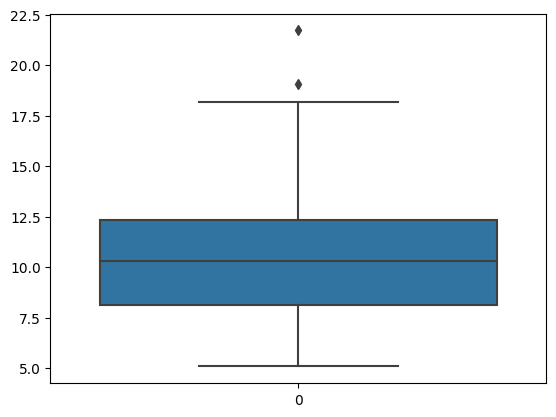

In [ ]:
#media de vendas por data
media_vendas_dias = df.groupby('OFFER_START_DATE').SOLD_QUANTITY.mean()
sns.boxplot(media_vendas_dias)
display(media_vendas_dias)



#sns.boxplot(a.SOLD_QUANTITY)


count    61.000000
mean     10.778900
std       3.648240
min       5.083744
25%       8.108939
50%      10.319905
75%      12.360000
max      21.718391
Name: SOLD_QUANTITY, dtype: float64

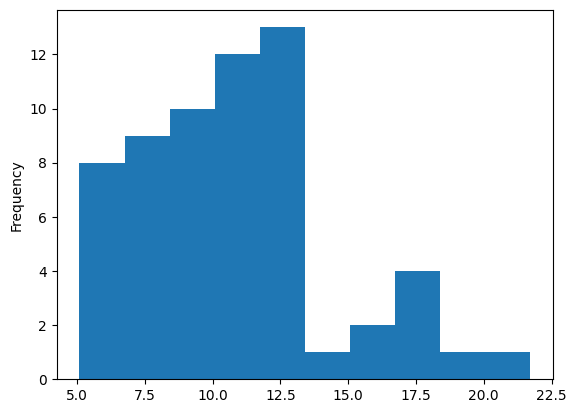

In [ ]:
media_vendas_dias.plot(kind='hist')
media_vendas_dias.describe()

Verificando a média de venda por dominio

VERTICAL
ACC                 20.488908
APP & SPORTS        19.717455
BEAUTY & HEALTH    123.628561
CE                  80.103321
CPG                 13.908600
ENTERTAINMENT       11.171742
HOME & INDUSTRY     28.912192
OTHERS              16.212101
T & B               18.313419
Name: SOLD_AMOUNT, dtype: float64

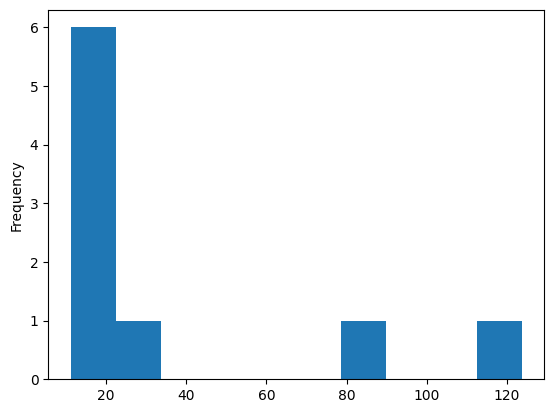

In [ ]:
media_venda_dominio = df.groupby('VERTICAL').SOLD_AMOUNT.mean()
media_venda_dominio.plot(kind='hist')
media_venda_dominio